In [107]:
import json
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from cycler import cycler
cm = plt.cm.tab10.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--', '-.']))
# for d in cycle:
#     print(d)
plt.rcParams['figure.figsize'] = [16, 8]
matplotlib.rcParams['figure.dpi'] = 300

In [41]:
# list_of_files = glob.glob('../data/*') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)

# Experiment 2: Scaling behaviour of GOMEA and SimpleGA on LeadingOnes

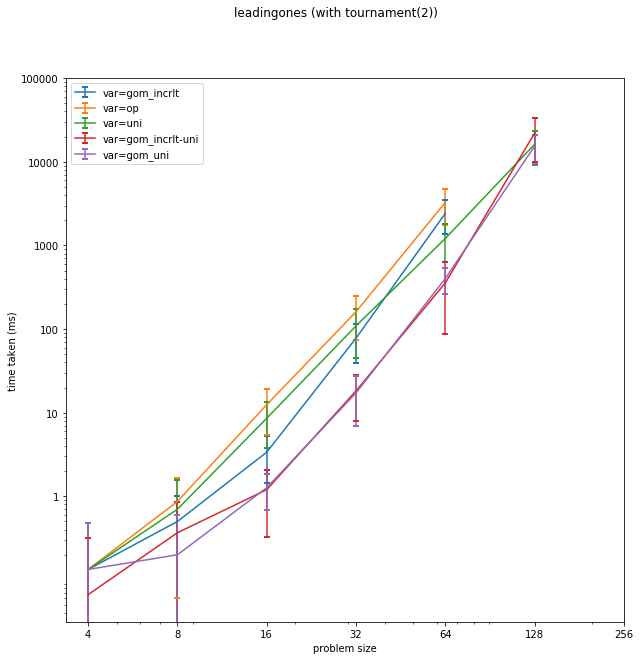

In [85]:
tournamentsize = 2
# problem = 'onemax'
problem = 'leadingones'

# filename = "../data/exp1/" + str(problem) + "_tour" + str(tournamentsize) + ".json"
# filename = "../data/exp1/191125_183904_rawdata.json"
filename = "../data/exp2/data_combined.json"


with open(filename) as json_file:
    data = json.load(json_file)
    
    fig = plt.figure()
    fig.suptitle(str(problem) + " (with tournament(" + str(tournamentsize) + "))")
    
    data1 = data['sel=tour' + str(tournamentsize)]
    
    for var in data1:
        data2 = data1[var]
        numEntries = len(data2)
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data2))):

            problemSizes[i] = problemsize

            repetitions = data2[str(problemsize)]
            times = np.empty(30)
            for j, rep in enumerate(repetitions):
                time = repetitions[rep]['timeTaken']
                times[j] = time

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)

        plt.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=var)
    
    plt.legend()
    plt.xlabel('problem size')
    plt.ylabel('time taken (ms)')
    plt.xscale('log')
    plt.yscale('log')
    
    y = [10**x for x in range(6)]
    x = [2**x for x in range(2,9)]
    plt.yticks(y, y)
    plt.xticks(x, x)

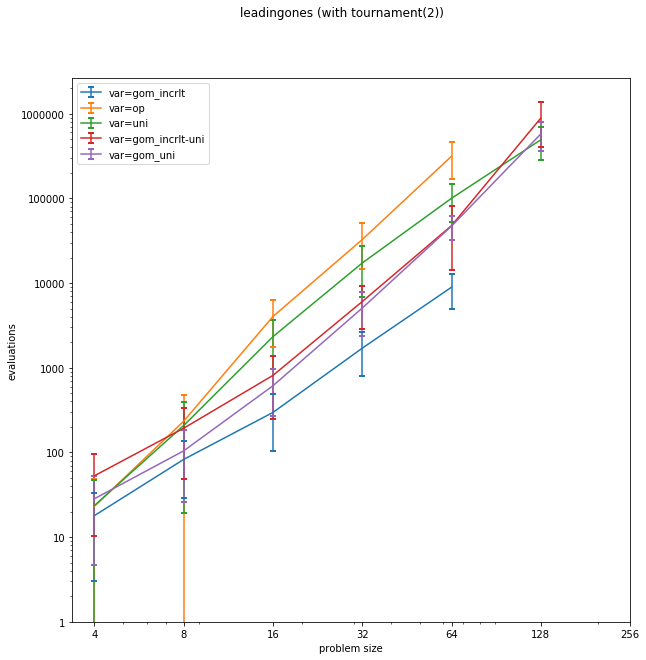

In [88]:
tournamentsize = 2
# problem = 'onemax'
problem = 'leadingones'

# filename = "../data/exp1/" + str(problem) + "_tour" + str(tournamentsize) + ".json"
# filename = "../data/exp1/191125_183904_rawdata.json"
# filename = "../data/exp1/191125_185805_rawdata.json"
filename = "../data/exp2/data_combined.json"

with open(filename) as json_file:
    data = json.load(json_file)
    
    fig = plt.figure()
    fig.suptitle(str(problem) + " (with tournament(" + str(tournamentsize) + "))")
    
    data1 = data['sel=tour' + str(tournamentsize)]
    
    for var in data1:
        data2 = data1[var]
        numEntries = len(data2)
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data2))):

            problemSizes[i] = problemsize

            repetitions = data2[str(problemsize)]
            times = np.empty(30)
            for j, rep in enumerate(repetitions):
                time = repetitions[rep]['evaluations']
                times[j] = time

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)

        plt.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=var)
    
    plt.legend()
    plt.xlabel('problem size')
    plt.ylabel('evaluations')
    plt.xscale('log')
    plt.yscale('log')
    
    y = [10**x for x in range(7)]
    x = [2**x for x in range(2,9)]
    plt.yticks(y, y)
    plt.xticks(x, x)

# Merging raw JSON data files

In [144]:
from jsonmerge import merge
import json

def mergeJSON(json_1_file_loc, json_2_file_loc, result_file_loc):
    with open(json_1_file_loc) as json_file:
        json1 = json.load(json_file)
#         for p in json1['sel=tour2']:
#             print(p)

    with open(json_2_file_loc) as json_file:
        json2 = json.load(json_file)
#         for p in json2['sel=tour2']:
#             print(p)
            
    result = merge(json1, json2)

    with open(result_file_loc, 'w') as outfile:
        json.dump(result, outfile)

In [256]:
mergeJSON('../data/exp6/combine2/data_univariateOrderedReversed.json',
          '../data/exp6/combine2/data_combined.json', 
          '../data/exp6/combine2/data_combined.json')

# Experiment 3: Different algorithms on Leading Ones with solvable initial population

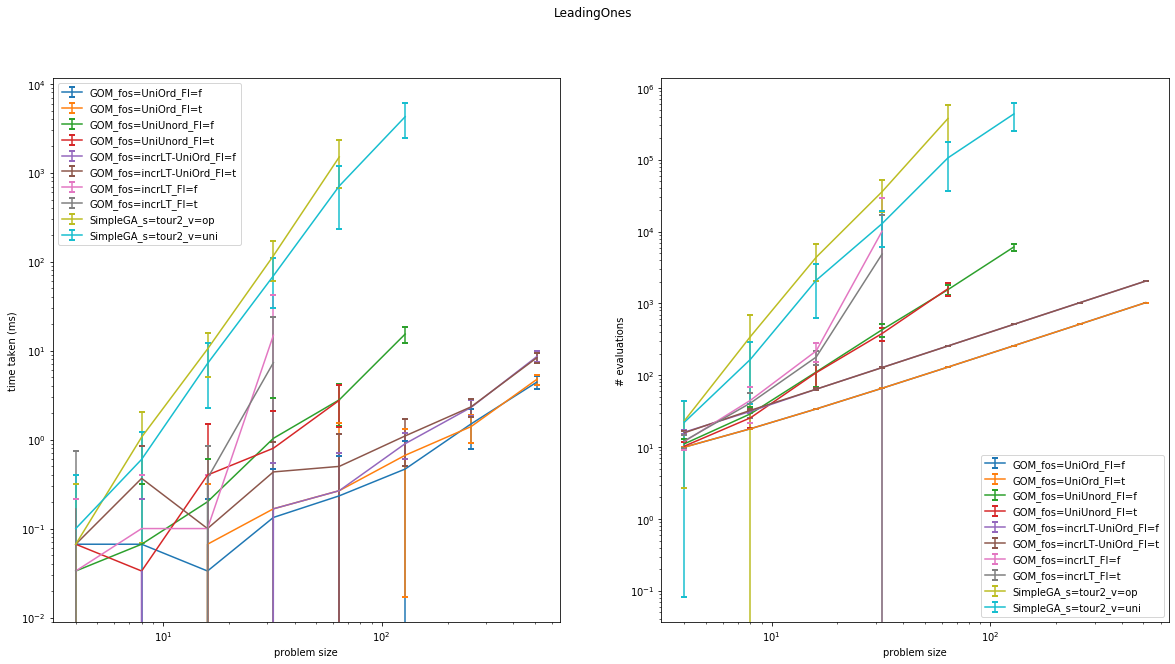

In [178]:
problem = 'LeadingOnes'

filename = "../data/exp3/data_all.json"

fig, (ax1, ax2) = plt.subplots(1, 2)

with open(filename) as json_file:
    data = json.load(json_file)
    
#     fig = plt.figure()
    fig.suptitle(str(problem))
    
    experiments = data['experiments']
        
    numExperiments = len(experiments);
#     print("Experiments =", numExperiments);
    
    for exp in experiments:
        data = experiments[exp]
        numEntries = len(data)
        
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        avgEvaluations = np.zeros(numEntries)
        stdEvaluations = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data))):
#             print(problemsize)
            problemSizes[i] = problemsize

            repetitions = data[str(problemsize)]
            times = np.empty(len(repetitions))
            evaluations = np.empty(len(repetitions))
            for j, rep in enumerate(repetitions):
                times[j] = repetitions[rep]['timeTaken']
                evaluations[j] = repetitions[rep]['evaluations']

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)
            avgEvaluations[i] = np.mean(evaluations)
            stdEvaluations[i] = np.std(evaluations)

        ax1.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=exp)
        ax2.errorbar(problemSizes, avgEvaluations, yerr=stdEvaluations,
                    capsize=3, capthick=2, label=exp)
    
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('problem size')
    ax2.set_xlabel('problem size')
    ax1.set_ylabel('time taken (ms)')
    ax2.set_ylabel('# evaluations')
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    
#     y = [10**x for x in range(6)]
#     x = [2**x for x in range(2,9)]
#     plt.yticks(y, y)
#     plt.xticks(x, x)


# Experiment 4: Plotting results of Learned LT FOS on different toy problems

averages of 10 repetitions


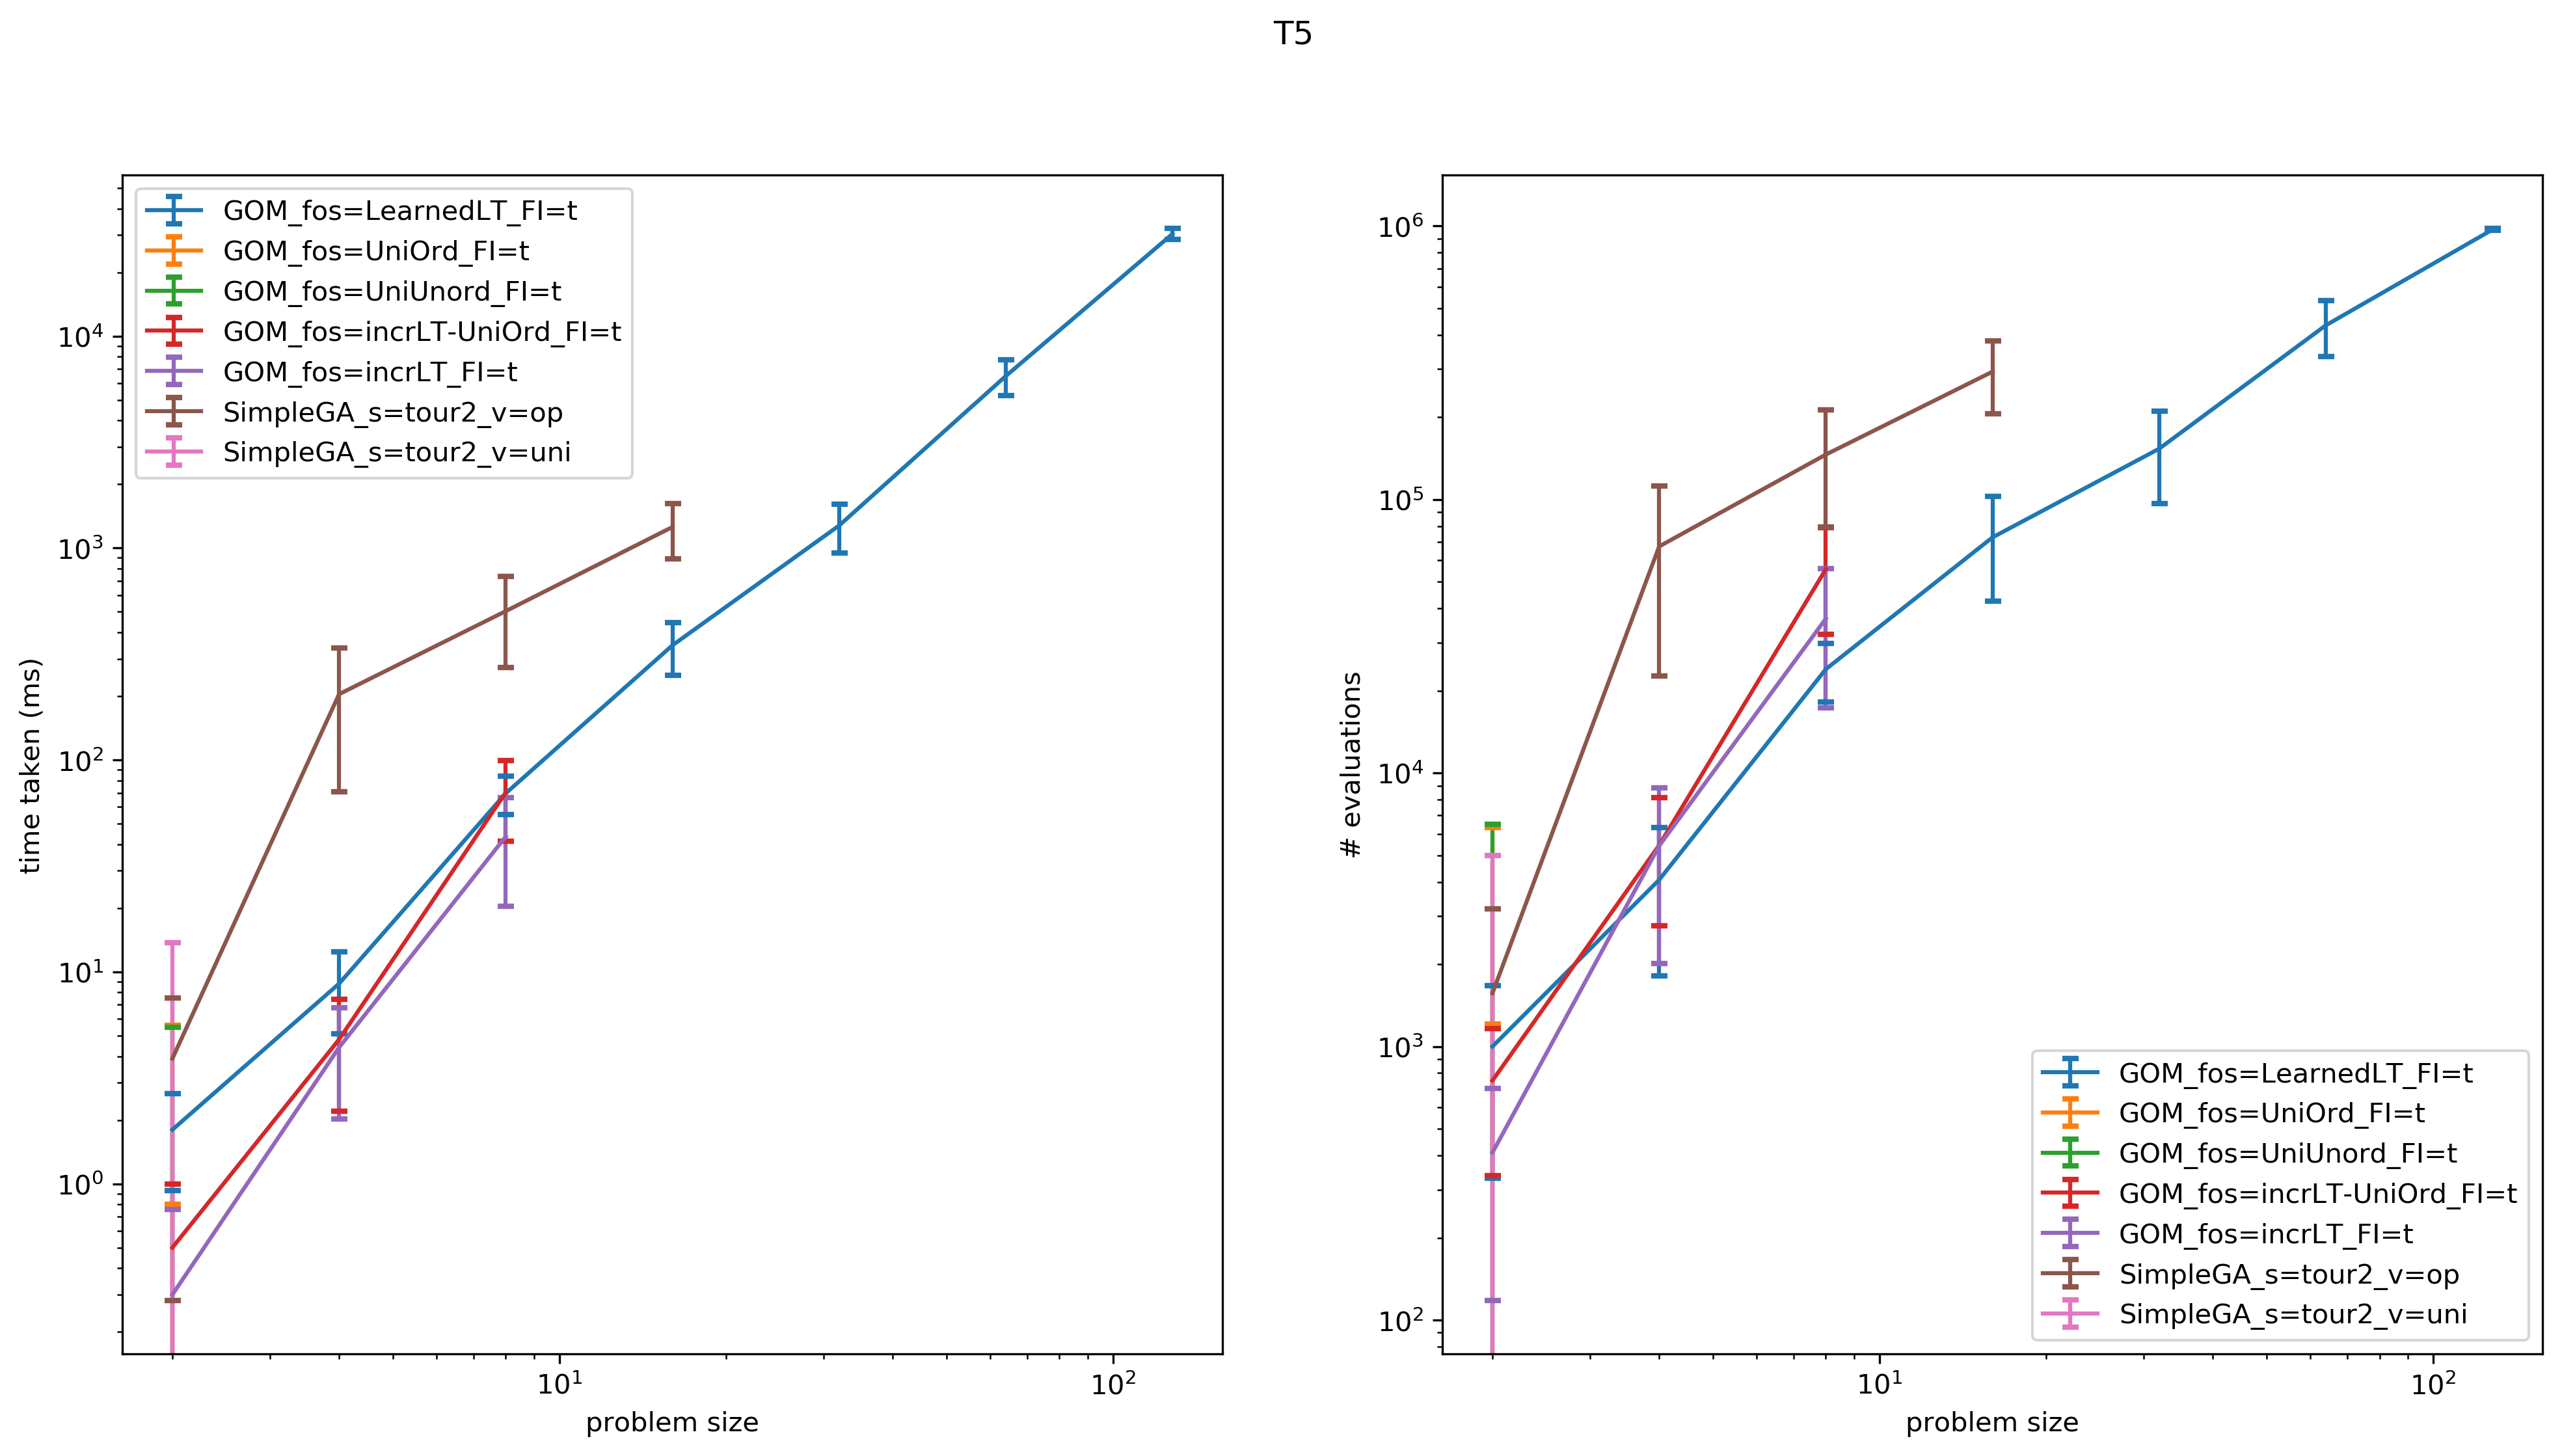

In [87]:
problem = 'LeadingOnes'

# filename = "../data/exp4/data_trap3.json"
filename = "../data/exp4/data_trap5.json"
# filename = "../data/exp4/data_leadingones.json"
# filename = "../data/exp4/data_onemax.json"


fig, (ax1, ax2) = plt.subplots(1, 2)

with open(filename) as json_file:
    rawdata = json.load(json_file)
    
#     fig = plt.figure()
    fig.suptitle(rawdata['fitnessFunction'])
    
    experiments = rawdata['experiments']
        
    numExperiments = len(experiments);
#     print("Experiments =", numExperiments);
    
    for exp in experiments:
        data = experiments[exp]
        numEntries = len(data)
        
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        avgEvaluations = np.zeros(numEntries)
        stdEvaluations = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data))):
#             print(problemsize)
            problemSizes[i] = problemsize

            repetitions = data[str(problemsize)]
            times = np.empty(len(repetitions))
            evaluations = np.empty(len(repetitions))
            for j, rep in enumerate(repetitions):
                times[j] = repetitions[rep]['timeTaken']
                evaluations[j] = repetitions[rep]['evaluations']

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)
            avgEvaluations[i] = np.mean(evaluations)
            stdEvaluations[i] = np.std(evaluations)

        ax1.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=exp)
        ax2.errorbar(problemSizes, avgEvaluations, yerr=stdEvaluations,
                    capsize=3, capthick=2, label=exp)
    
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('problem size')
    ax2.set_xlabel('problem size')
    ax1.set_ylabel('time taken (ms)')
    ax2.set_ylabel('# evaluations')
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    print("averages of", rawdata["repetitions"], "repetitions")



averages of 10 repetitions


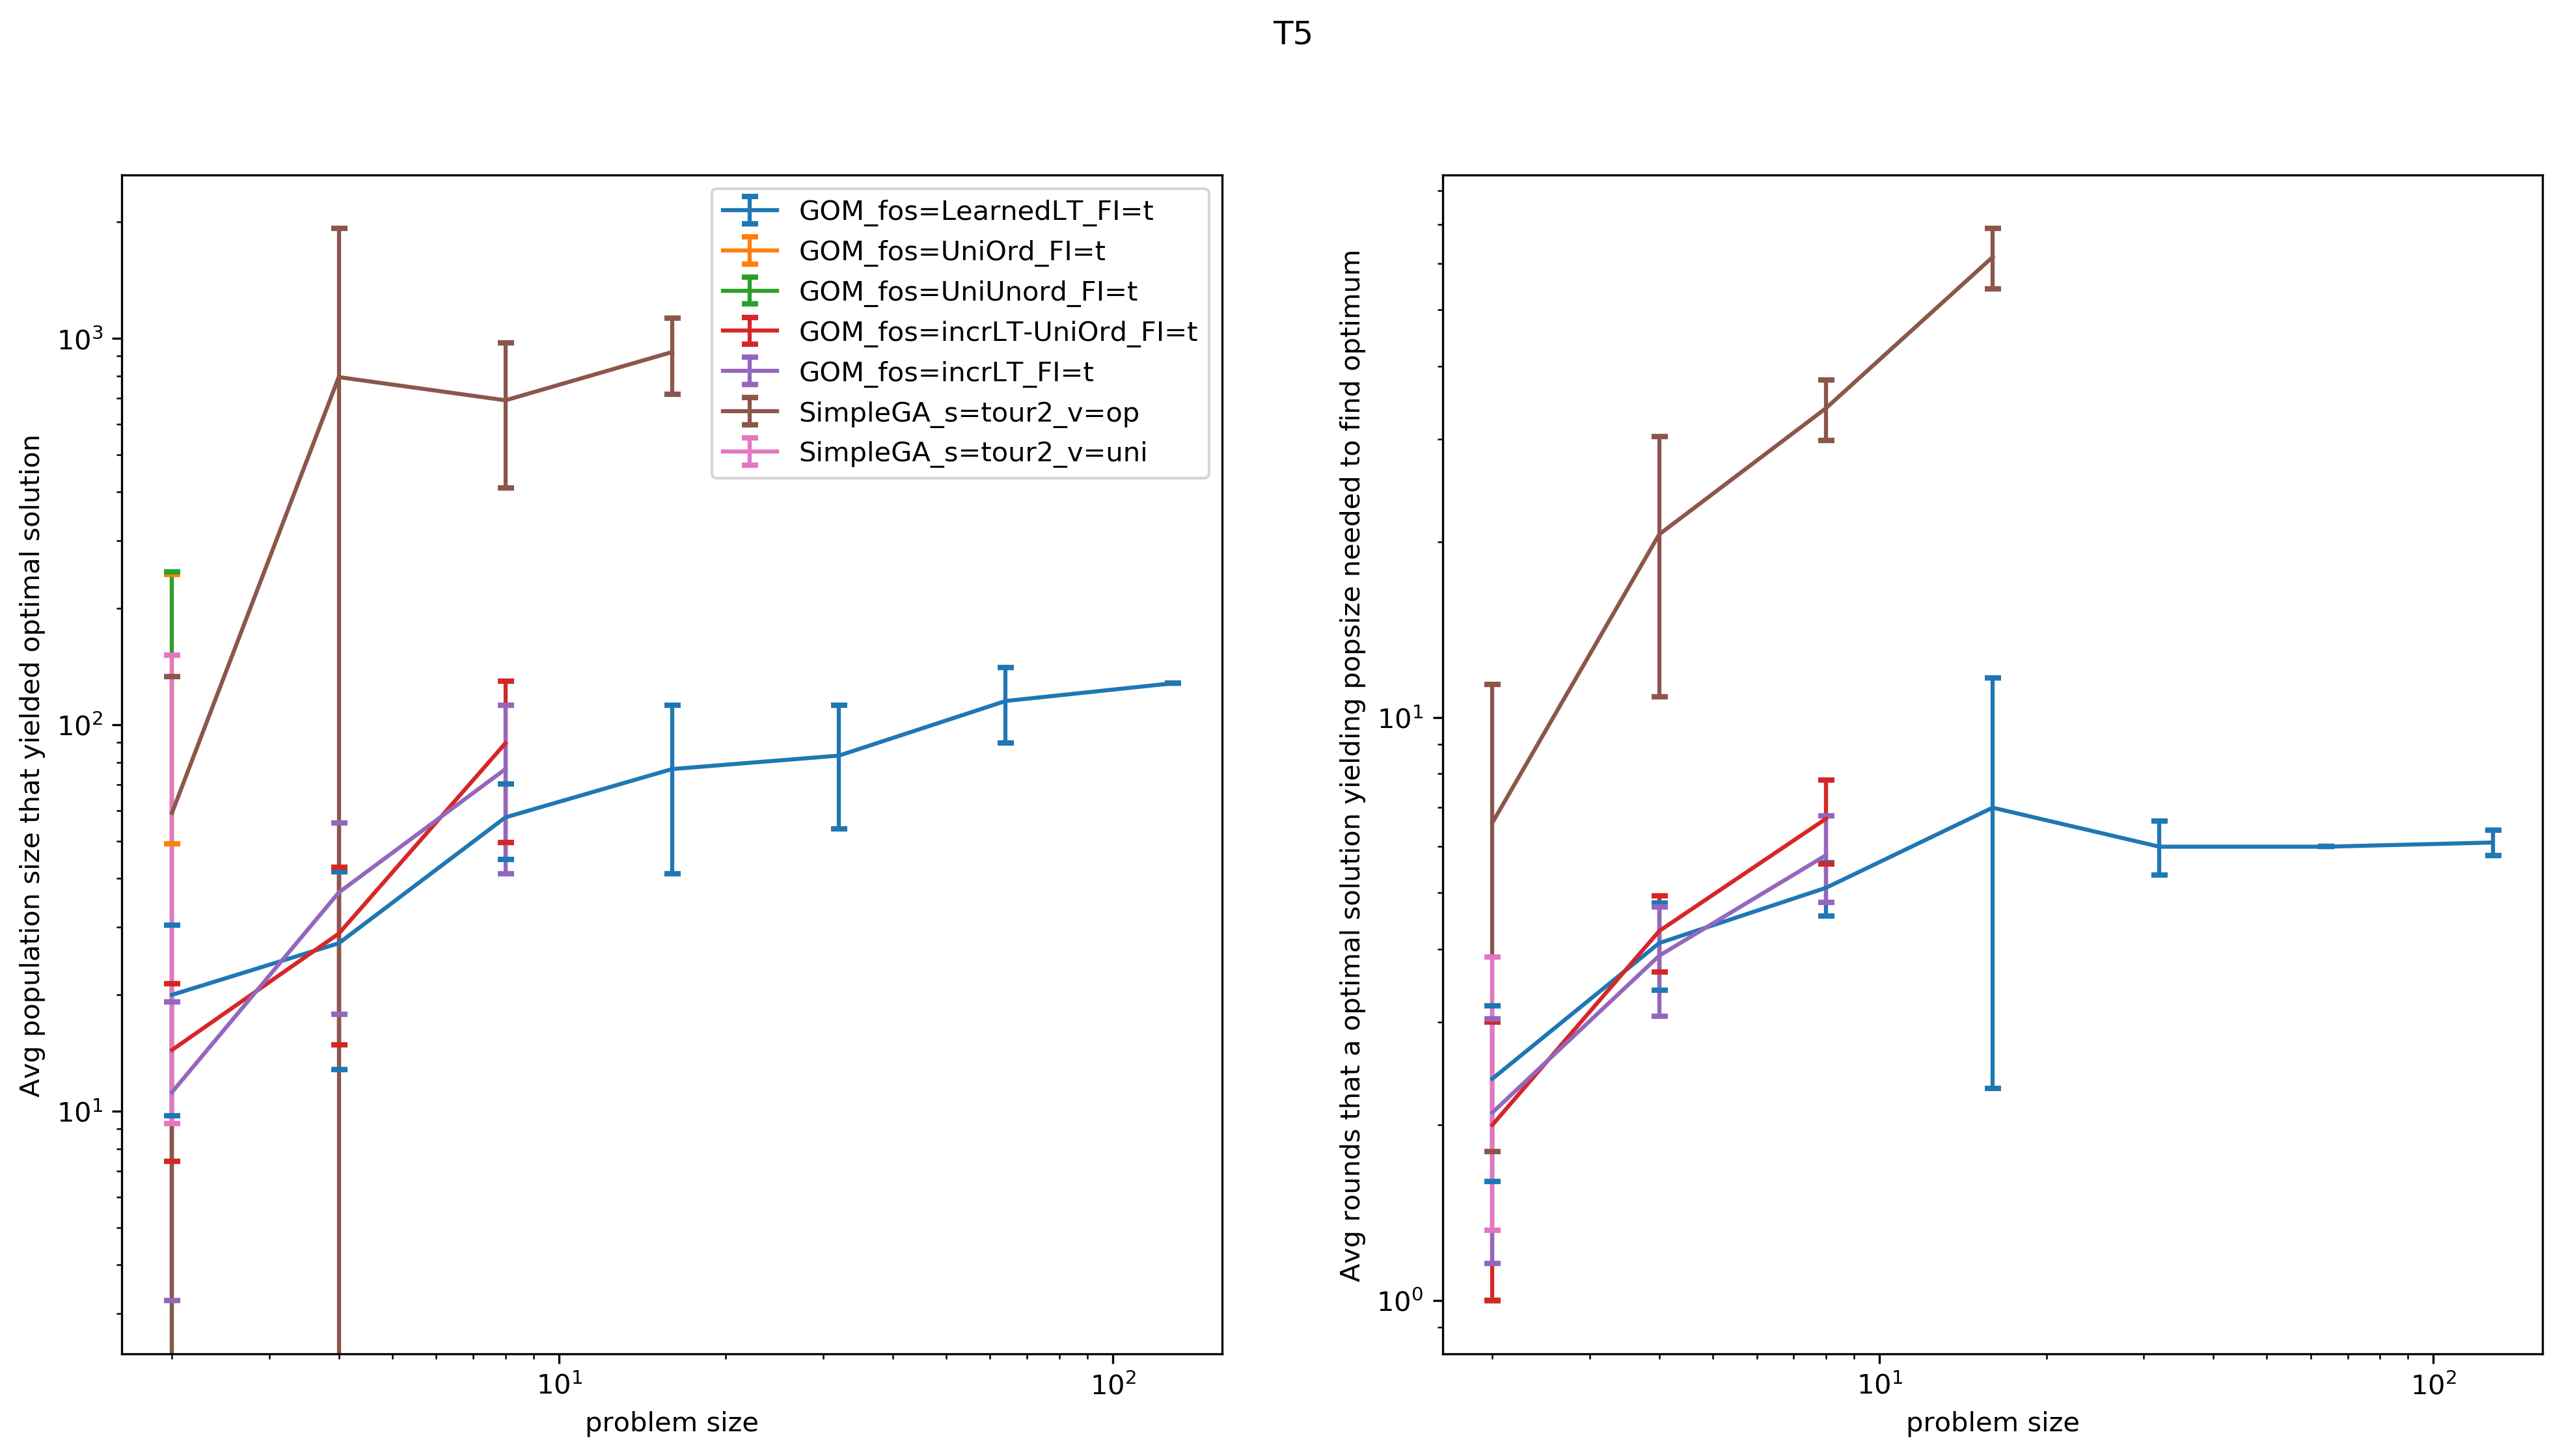

In [63]:
problem = 'LeadingOnes'

# filename = "../data/exp4/data_trap3.json"
filename = "../data/exp4/data_trap5.json"
# filename = "../data/exp4/data_leadingones.json"
# filename = "../data/exp4/data_onemax.json"


fig, (ax1, ax2) = plt.subplots(1, 2)

with open(filename) as json_file:
    rawdata = json.load(json_file)
    
#     fig = plt.figure()
    fig.suptitle(rawdata['fitnessFunction'])
    
    experiments = rawdata['experiments']
        
    numExperiments = len(experiments);
#     print("Experiments =", numExperiments);
    
    for exp in experiments:
        data = experiments[exp]
        numEntries = len(data)
        
        avgSuccesfulPopulation = np.zeros(numEntries)
        stdSuccesfulPopulation = np.zeros(numEntries)
        avgRoundCount = np.zeros(numEntries)
        stdRoundCount = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data))):
#             print(problemsize)
            problemSizes[i] = problemsize

            repetitions = data[str(problemsize)]
            succesfulPops = np.empty(len(repetitions))
            roundcounts = np.empty(len(repetitions))
            for j, rep in enumerate(repetitions):
                succesfulPops[j] = repetitions[rep]['successfulGAPopulation']
                roundcounts[j] = repetitions[rep]['successfulGARoundCount']

            avgSuccesfulPopulation[i] = np.mean(succesfulPops)
            stdSuccesfulPopulation[i] = np.std(succesfulPops)
            avgRoundCount[i] = np.mean(roundcounts)
            stdRoundCount[i] = np.std(roundcounts)

        ax1.errorbar(problemSizes, avgSuccesfulPopulation, yerr=stdSuccesfulPopulation, 
                     capsize=3, capthick=2, label=exp)
        ax2.errorbar(problemSizes, avgRoundCount, yerr=stdRoundCount,
                    capsize=3, capthick=2, label=exp)
    
    ax1.legend()
    ax1.set_xlabel('problem size')
    ax2.set_xlabel('problem size')
    ax1.set_ylabel('Avg population size that yielded optimal solution')
    ax2.set_ylabel('Avg rounds that a optimal solution yielding popsize needed to find optimum')
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    print("averages of", rawdata["repetitions"], "repetitions")



# Experiment 5: All algorithms on python 101-NAS Benchmark

averages of 10 repetitions


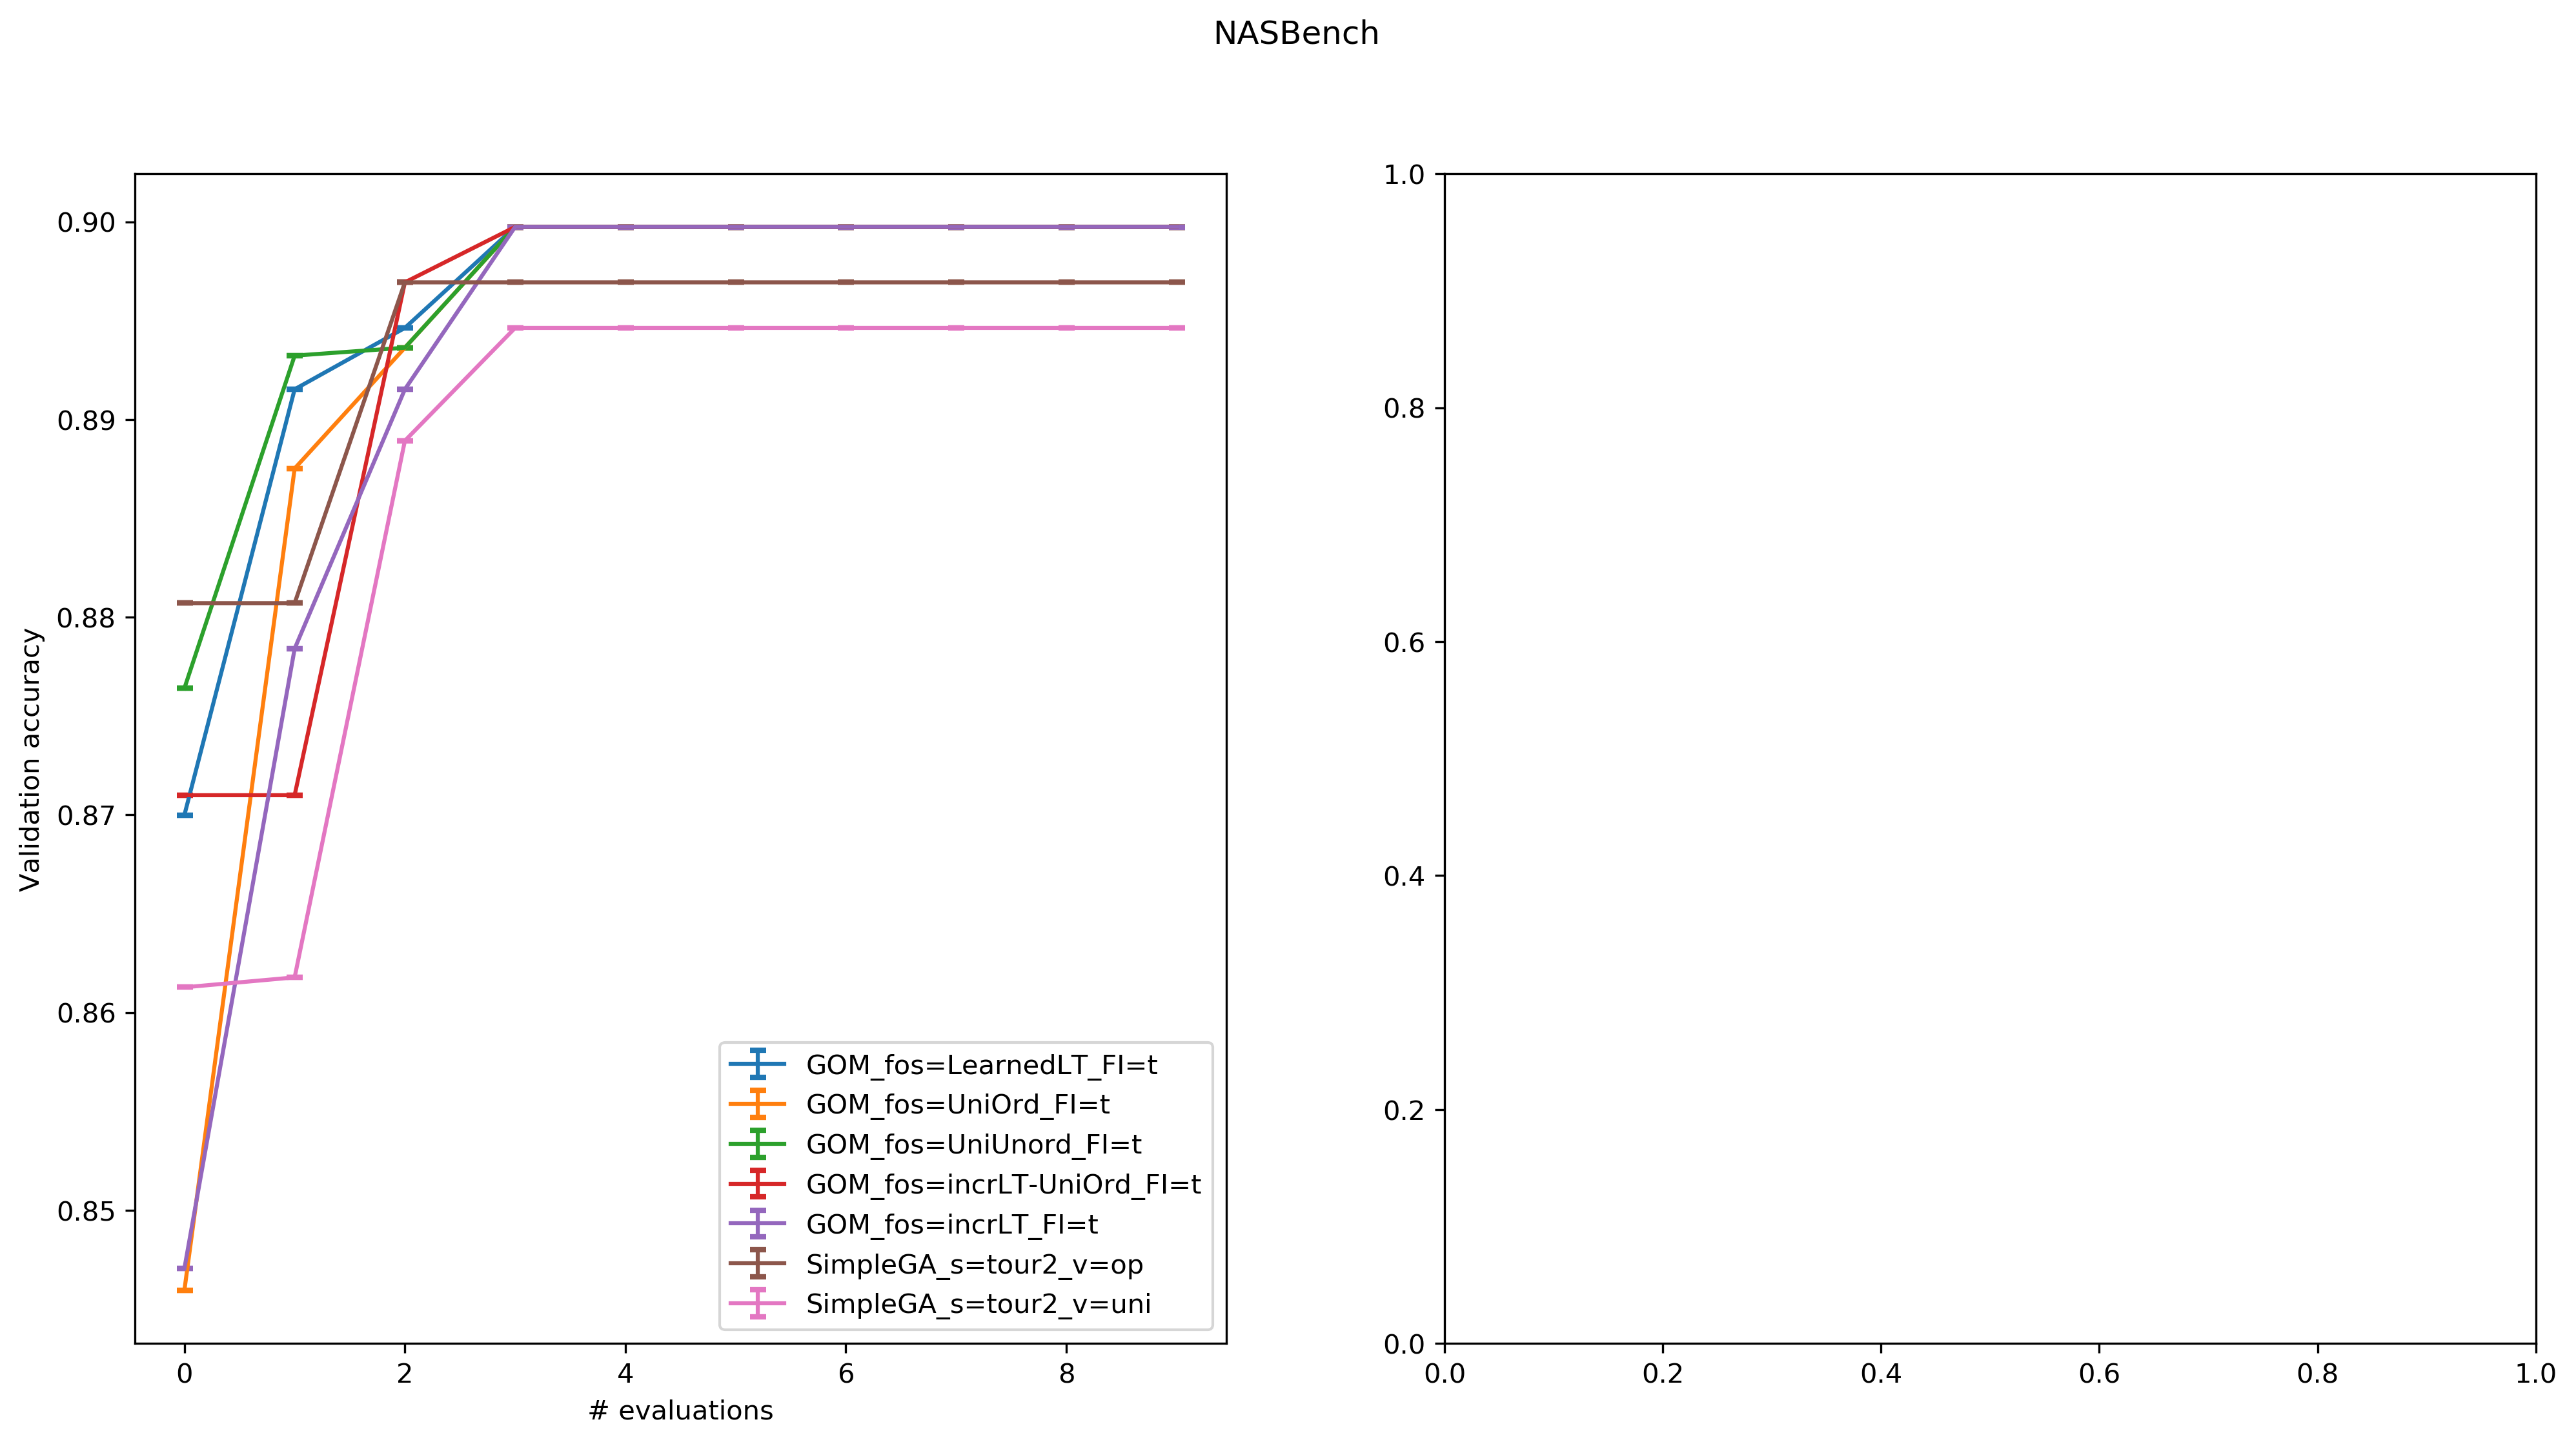

In [10]:
filename = "../data/exp5/data.json"

fig, (ax1, ax2) = plt.subplots(1, 2)

maxX = 10;

with open(filename) as json_file:
    rawdata = json.load(json_file)
    
    fig.suptitle(rawdata['fitnessFunction'])
    
    experiments = rawdata['experiments']
    
    for exp in experiments:
        data = experiments[exp]
        numEntries = len(data)
        numEvaluations = min((int)(len(data["0"]["convergence"]) * 1.1), maxX)        
        
        accuracies = np.zeros((numEntries, numEvaluations))
    
        for i, rep in enumerate(data):
            for j, evals in enumerate(data[rep]["convergence"]):
                if(j >= maxX):
                    break;
                accuracies[i][j] = data[rep]["convergence"][evals];
        
        avgAccuracies = np.mean(accuracies, 0)
        stdAccuracies = np.std(accuracies, 0)

#         print(avgAccuracies)
        ax1.errorbar(range(numEvaluations), avgAccuracies, yerr=stdAccuracies, capsize=3, capthick=2, label=exp)
    
    ax1.legend()
    ax1.set_xlabel('# evaluations')
    ax1.set_ylabel('Validation accuracy')
#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
    print("averages of", rawdata["repetitions"], "repetitions")



# Experiment 6: All algorithms on NASBenchV2 (Convergence plots)

averages of 50 repetitions


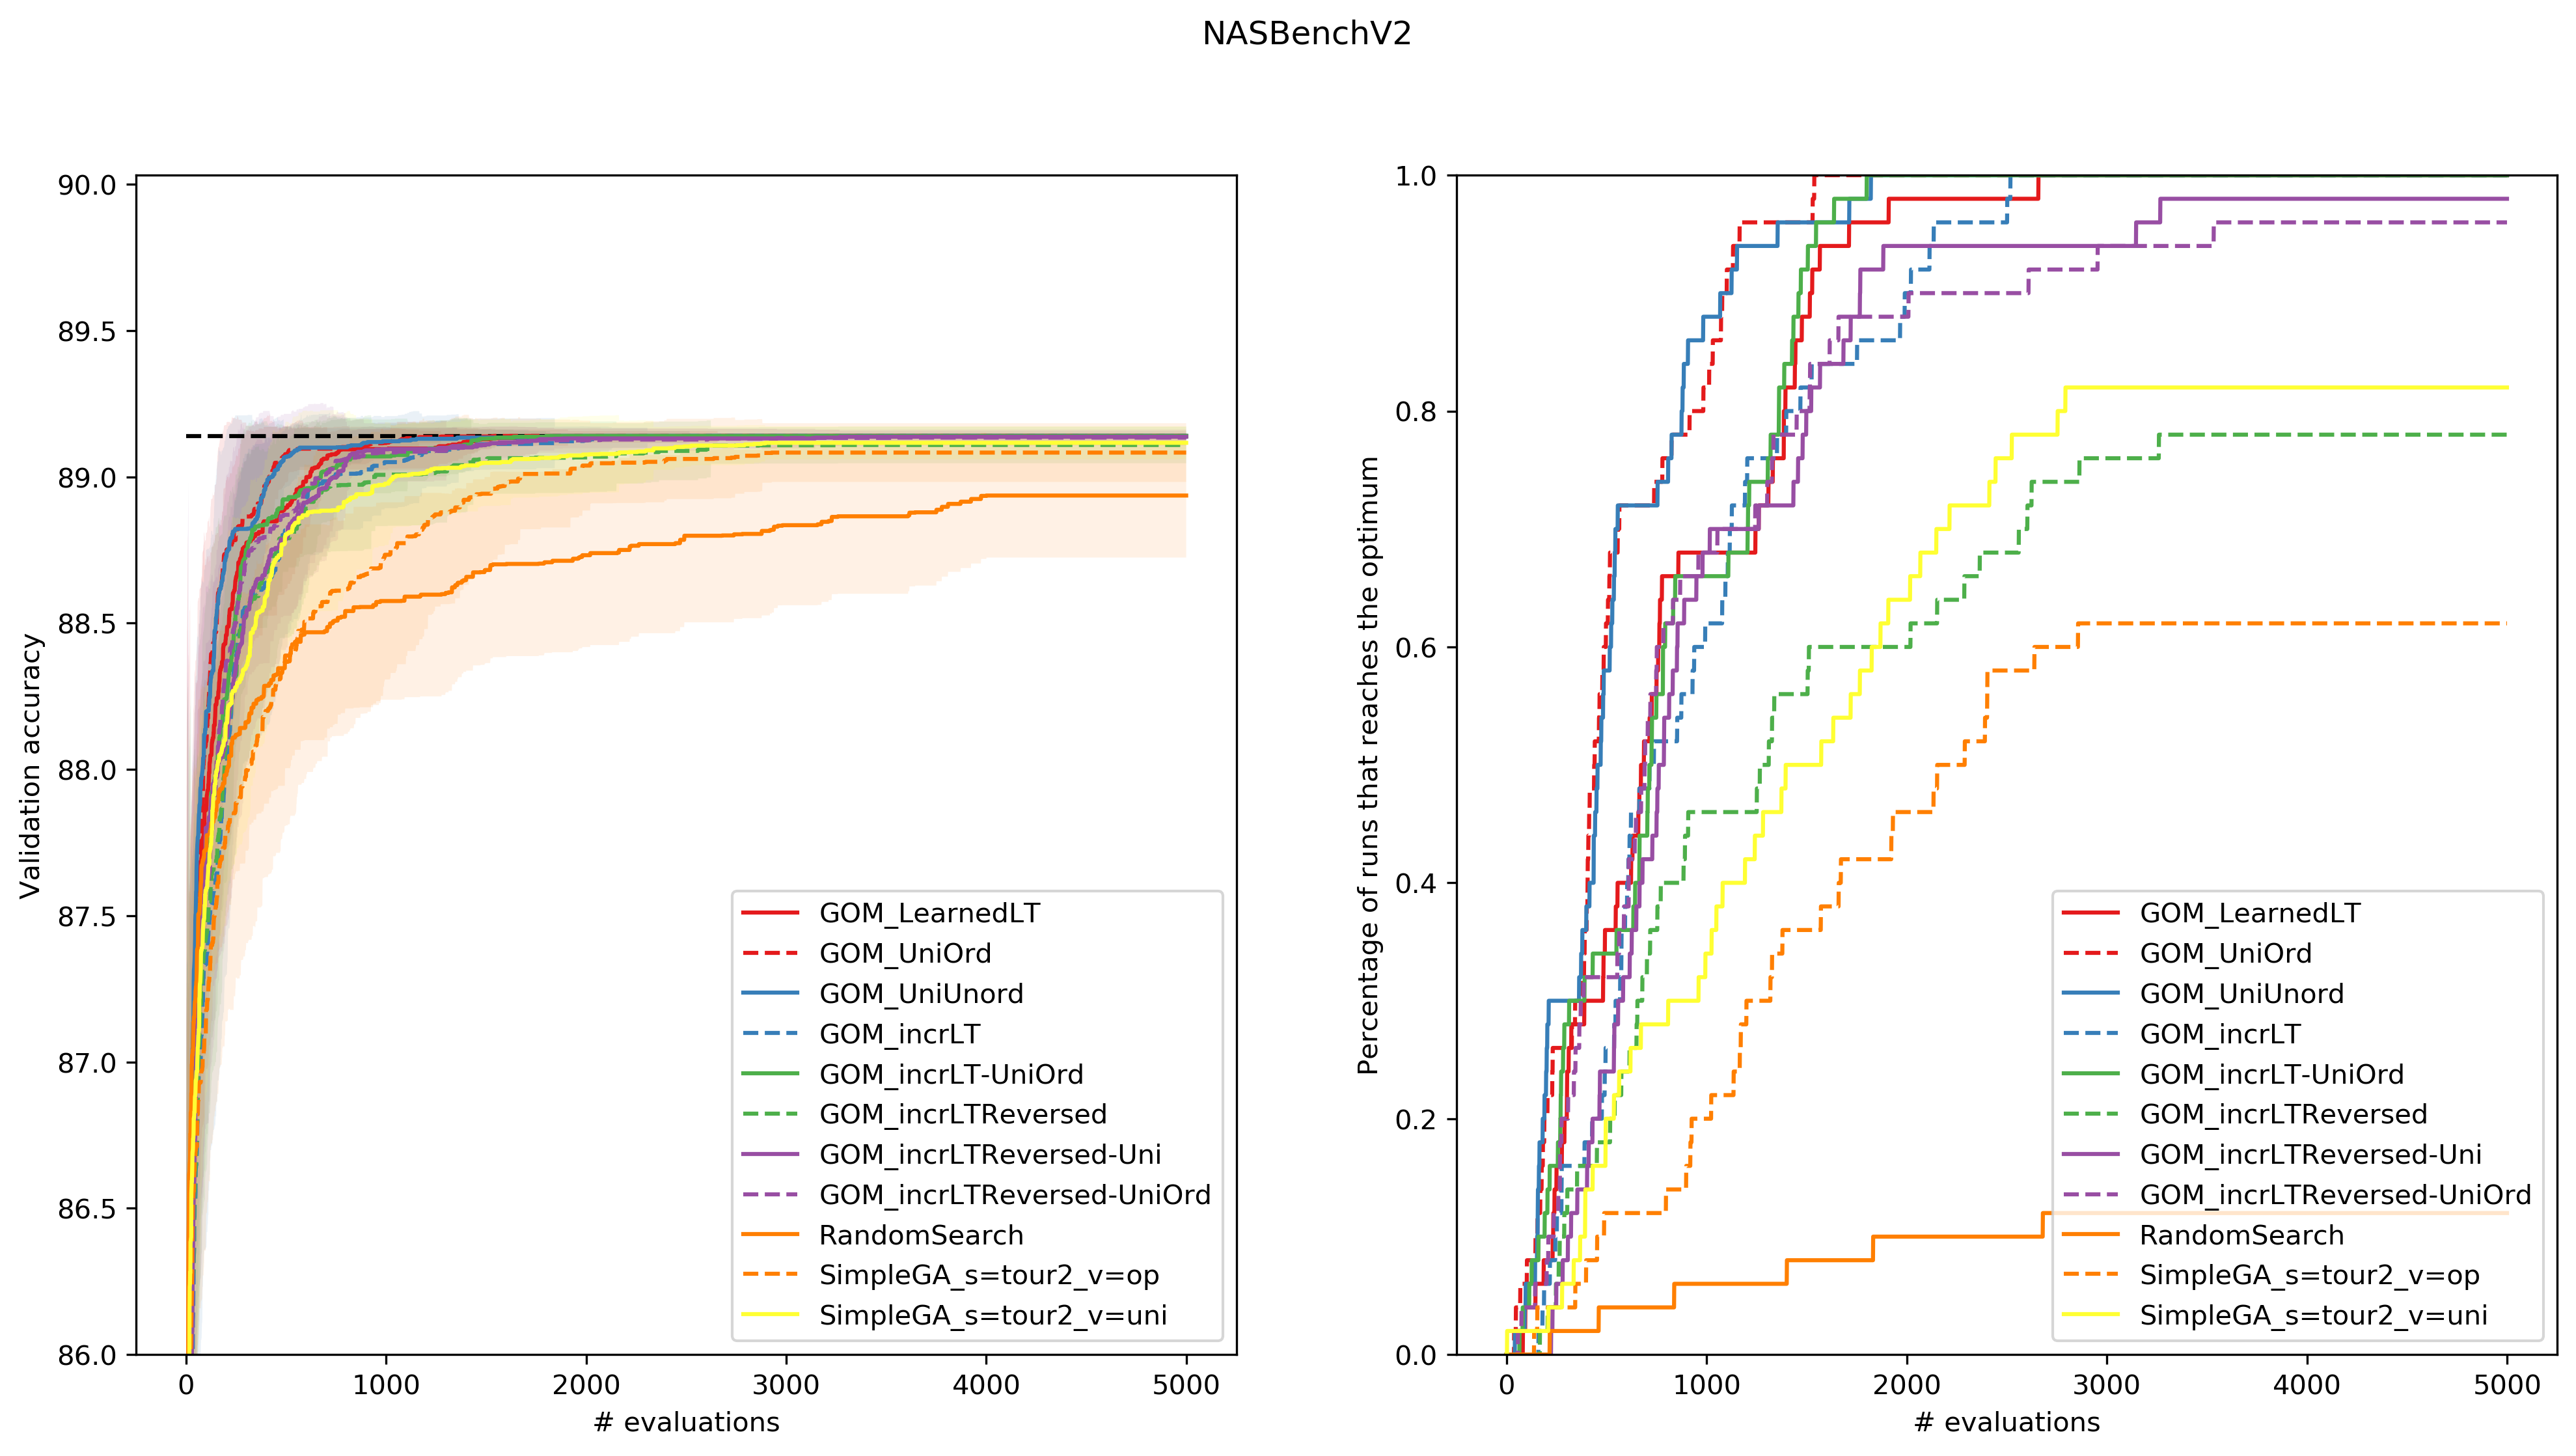

In [273]:
# Until 4000 absolute evaluations. 
# Alphabet={0,1,2,3}, so smaller architectures are also in the search.
# GOM with reversed Univariate Ordered FOS is not included.
filename = "../data/exp6/data3.json"

fig, (ax1, ax2) = plt.subplots(1, 2)
cm = plt.cm.Set1.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
ax1.set_prop_cycle(cycle)
ax2.set_prop_cycle(cycle)

maxX = 5000;
optimum = 89.13

with open(filename) as json_file:
    rawdata = json.load(json_file)
    repetitions = rawdata["repetitions"]
    
    fig.suptitle(rawdata['fitnessFunction'])
    algorithms = rawdata['experiments']
    totalBest = 0;
    
    for algo in algorithms:
        data = algorithms[algo]
        numEntries = len(data)
        numEvaluations = maxX;
        
        accuracies = np.zeros((numEntries, numEvaluations))
        optfound = np.zeros((numEntries, numEvaluations))
    
        for i, rep in enumerate(data):
            bestSoFar = -1;
            
            for evals in range(1,numEvaluations):
                
                if(evals <= len(data[rep]["convergence"])):
                    bestSoFar = data[rep]["convergence"][str(evals)];
#                     if(bestSoFar >= optimum):
#                         bestSoFar = 100
                accuracies[i][evals] = bestSoFar
            
                if(bestSoFar >= optimum):
#                     print(i, evals, "opt found")
                    optfound[i][evals] = 1
            totalBest = max(totalBest, bestSoFar)
            
        avgAccuracies = np.mean(accuracies, 0)
        stdAccuracies = np.std(accuracies, 0)
        
        totalOptfound = np.sum(optfound, 0) / repetitions

        ax1.plot(range(numEvaluations), avgAccuracies, label=algo)
        ax1.fill_between(range(numEvaluations), avgAccuracies-stdAccuracies, avgAccuracies+stdAccuracies, alpha=0.1)
        
        ax2.plot(range(numEvaluations), totalOptfound, label=algo)
    
    ax1.set_ylim(86,totalBest * 1.01)
    ax1.legend()
    ax1.set_xlabel('# evaluations')
    ax1.set_ylabel('Validation accuracy')
    ax1.hlines(89.14, 0, maxX, linestyles='dashed')
#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
    
    ax2.set_ylim(0,1)
    ax2.legend()
    ax2.set_xlabel('# evaluations')
    ax2.set_ylabel('Percentage of runs that reaches the optimum')

    print("averages of", repetitions, "repetitions")



# Experiment 6: All algorithms on NASBenchV2 (Scalability Plots)

averages of 50 repetitions


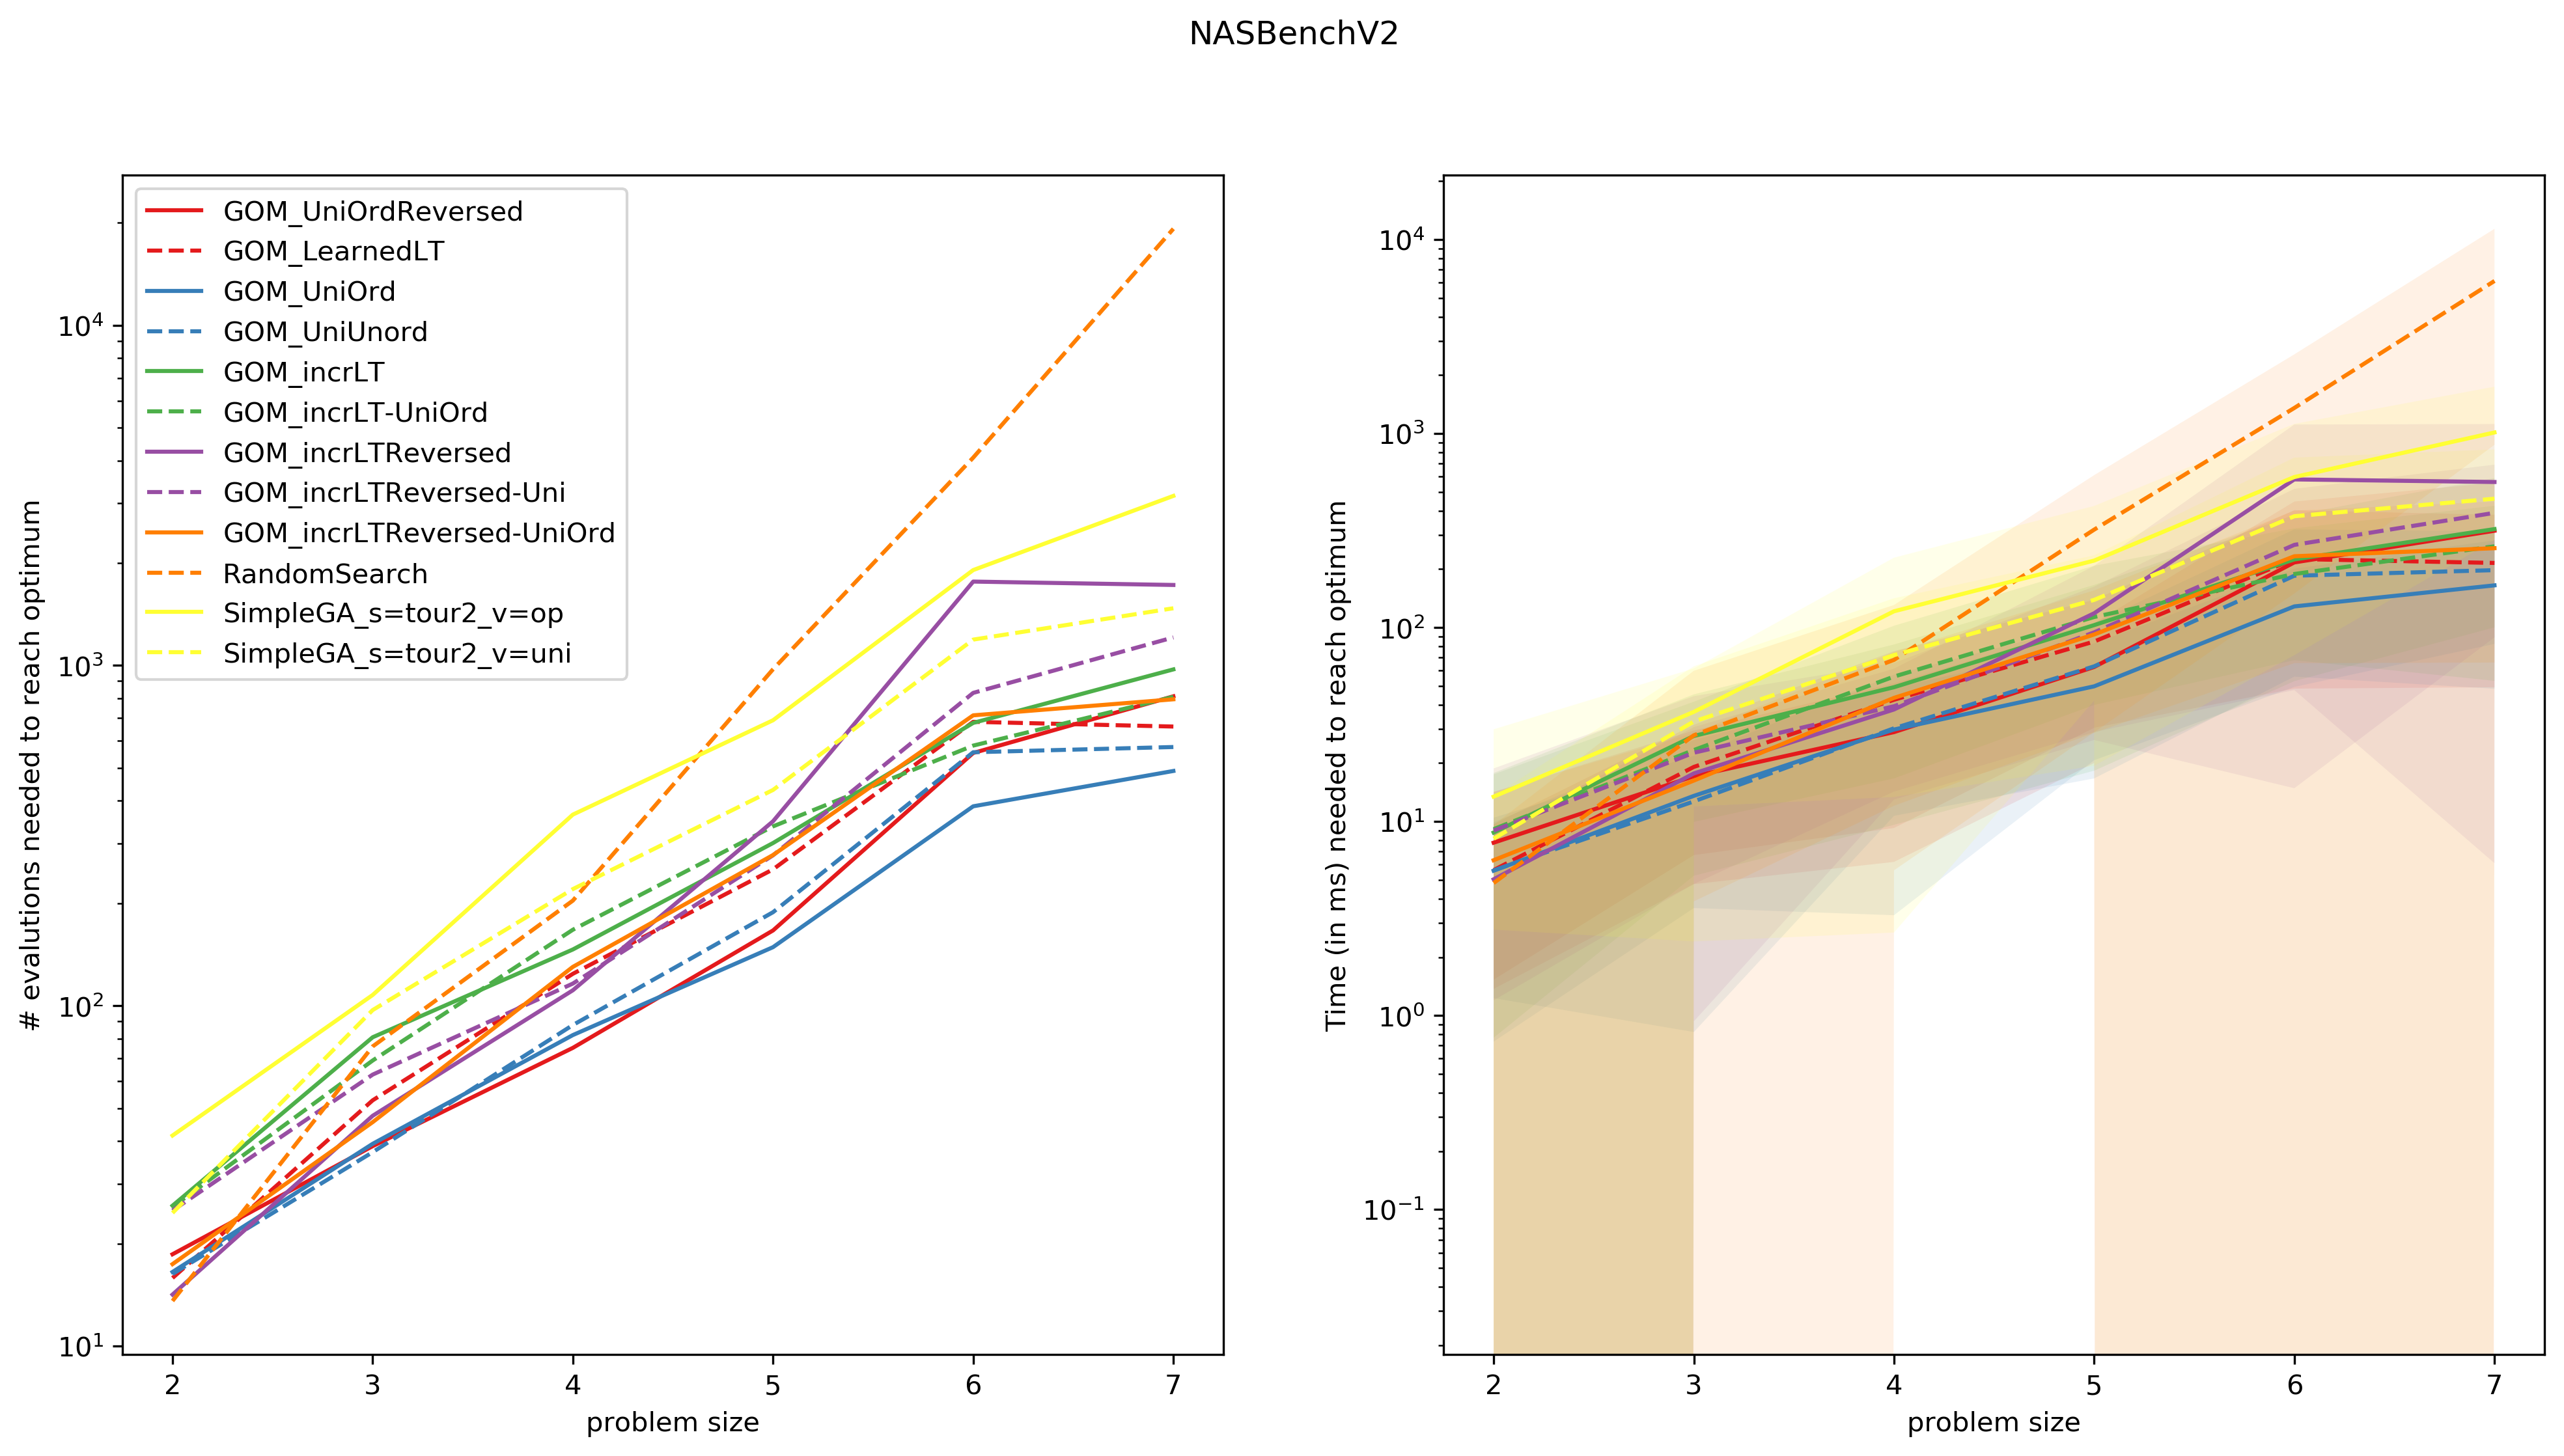

In [274]:

# filename = "../data/exp6/noncombinedfiles/data_combined.json"
filename = "../data/exp6/combine2/data_combined.json"

fig, (ax1, ax2) = plt.subplots(1, 2)
cm = plt.cm.Set1.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
ax1.set_prop_cycle(cycle)
ax2.set_prop_cycle(cycle)

selection = ["GOM_LearnedLT", "GOM_UniOrd", "GOM_UniUnord", "GOM_UniOrdReversed"]

with open(filename) as json_file:
    rawdata = json.load(json_file)
    
    fig.suptitle(rawdata['fitnessFunction'])
    algorithms = rawdata['experiments']
    
    repetitions = rawdata['repetitions']
        
    numAlgos = len(algorithms)
    
#     for algo in selection:
    for algo in algorithms:
        
        data = algorithms[algo]
        numEntries = len(data)
        
        Evaluations = np.zeros((numEntries, repetitions))
        Times = np.zeros((numEntries, repetitions))
        
        for i, problemsize in enumerate(data):
            
            for j, rep in enumerate(data[problemsize]):
                
                Evaluations[i][j] = data[problemsize][rep]["evaluations"]
                Times[i][j] = data[problemsize][rep]["timeTaken"]
        
        avgEvaluations = np.mean(Evaluations, 1);
        stdEvaluations = np.std(Evaluations, 1);
        avgTimes = np.mean(Times, 1);
        stdTimes = np.std(Times, 1)
        
        xrange = range(2,numEntries+2)
        
        ax1.plot(xrange, avgEvaluations, label=algo)
#         ax1.fill_between(xrange, avgEvaluations-stdEvaluations, avgEvaluations+stdEvaluations, alpha=0.1)
#         ax1.errorbar(xrange, avgEvaluations, yerr=stdEvaluations)
        
        ax2.plot(xrange, avgTimes, label=algo)
        ax2.fill_between(xrange, avgTimes-stdTimes, avgTimes+stdTimes, alpha=0.1)
    
    ax1.legend()
    ax1.set_xlabel('problem size')
    ax1.set_ylabel('# evalutions needed to reach optimum')
    ax1.set_yscale('log')

    
    ax2.set_xlabel('problem size')
    ax2.set_ylabel('Time (in ms) needed to reach optimum')
    ax2.set_yscale('log')
    print("averages of", repetitions, "repetitions")